In [1]:
from wordcloud import WordCloud
import pandas as pd

# text = '私は本当に私のために勉強している'
# https://www.bleague.jp/watching/covid19_measures/
text_pd = pd.read_csv('sample.txt').values
text_array = [*map(lambda x: x[0], text_pd)]
text = " ".join(text_array)

# fpath = "../../fonts/mplus-1c-black.ttf"
# wordcloud = WordCloud(background_color="white", font_path=fpath, width=900, height=500).generate(text)
# wordcloud.to_file("./wordcloud_sample.png")

In [33]:
import MeCab
import pandas as pd
from PIL import Image
import numpy as np

ignore_words = [
    'てる', 'いる', 'なる', 'れる', 'する', 'ある', 'こと', 'これ', 'さん', 'して',
    'くれる', 'やる', 'くださる', 'そう', 'せる', 'した',  '思う', 'それ', 'ここ', 'ちゃん',
    'くん', 'し', 'さ' '', 'て', 'に', 'を', 'は', 'の', 'が', 'と',
    'た', 'し', 'で', 'ない', 'も', 'な', 'い', 'か', 'ので', 'よう',
    'いたし', 'せ', 'れ', 
]

def mecab_analysis(text):
    mecab = MeCab.Tagger('-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')
    node = mecab.parseToNode(text)
    words = []
    while node:
        # ヘッダ、フッタ、除外ワードを除外。
        if node.surface != "" and node.surface not in ignore_words:
            word_type = node.feature.split(",")[0]
            
            if word_type in ["形容詞", "動詞", "名詞", "副詞"]:
                words.append(node.surface)
            
        node = node.next
    
    return words

words = mecab_analysis(text)
word_string = " ".join(words)

# フォント
fpath = "../../fonts/mplus-1c-black.ttf"

# 画像
mask = np.array(Image.open('jordan.jpg'))
# mask = np.array(Image.open('robots.png'))
# mask = np.array(Image.open('bleagu.png'))
mask = np.where(mask == 0, 0, 255)

wordcloud = WordCloud(
    mask=mask,
    background_color="white",
    font_path=fpath,
    width=900,
    height=500,
    regexp="[\w']+", # デフォルトだと2文字以上の単語しか抽出してこない
    contour_width=1,
    contour_color='black',
#     colormap = 'copper_r',
#     stopwords=set(stop_words),
).generate(word_string)
wordcloud.to_file("./wordcloud_sample.png")

In [20]:
import collections
c = collections.Counter(words)
print(c.most_common(20))

[('お願い', 25), ('場合', 22), ('来場', 17), ('ください', 14), ('方', 13), ('観戦', 9), ('スタッフ', 7), ('お客さま', 7), ('ため', 7), ('等', 7), ('防止', 7), ('座席', 7), ('新型コロナウイルス感染症', 6), ('観点', 6), ('際', 6), ('時', 6), ('アリーナ', 6), ('位置', 6), ('遠慮', 5), ('マスク', 5)]


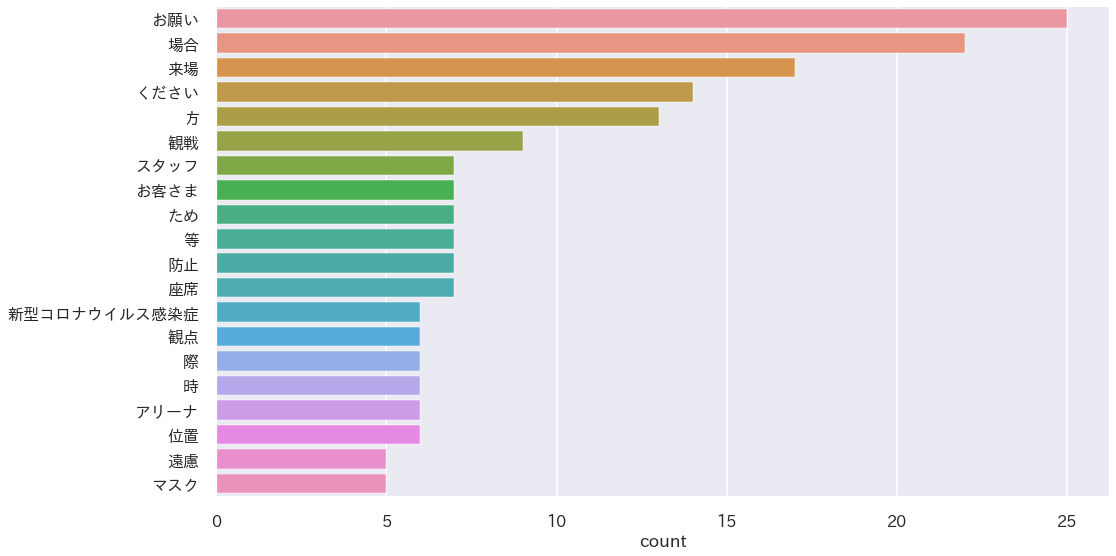

In [21]:
import japanize_matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
 
sns.set(context="talk")
sns.set(font="IPAexGothic") #日本語フォント設定
plt.style.use('seaborn-poster')
fig = plt.subplots(figsize=(16, 9))
sns.countplot(y=words, order=[i[0] for i in c.most_common(20)])

In [14]:
# デバッグよう
mecab = MeCab.Tagger('-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')
node = mecab.parseToNode(text)
words = []
words_type = []
while node:
    # ヘッダ、フッタ、除外ワードを除外。
    if node.surface != "" and node.surface not in ignore_words:
        word_type = node.feature.split(",")[0]

        if word_type in ["形容詞", "動詞", "名詞", "副詞"]:
            words.append(node.surface)
            words_type.append(word_type)

    node = node.next
            
word_df = pd.DataFrame({
    'word': words,
    'type': words_type
})
word_df

,word,type
0,目的,名詞
1,来場,名詞
2,お客様,名詞
3,周囲,名詞
4,お客様,名詞
...,...,...
665,2020,名詞
666,-2,名詞
667,1,名詞
668,シーズン,名詞


In [18]:
word_df[word_df.type == '形容詞']

,word,type
79,高い,形容詞
89,高い,形容詞
124,高い,形容詞
134,高い,形容詞
163,だる,形容詞


In [26]:
mask = np.array(Image.open('robots.png'))
mask
# mask = np.where(mask == 0, 0, 255)

array([[[ 27,  43,  92, 255],
        [ 27,  43,  92, 255],
        [ 27,  43,  92, 255],
        ...,
        [ 70, 186, 211, 255],
        [ 67, 186, 210, 255],
        [ 63, 183, 210, 255]],

       [[ 27,  43,  92, 255],
        [ 27,  43,  92, 255],
        [ 27,  43,  92, 255],
        ...,
        [ 61, 184, 210, 255],
        [ 60, 182, 210, 255],
        [ 54, 181, 210, 255]],

       [[ 27,  43,  92, 255],
        [ 27,  43,  92, 255],
        [ 27,  43,  92, 255],
        ...,
        [ 50, 181, 210, 255],
        [ 49, 180, 209, 255],
        [ 42, 178, 209, 255]],

       ...,

       [[125, 114,  92, 255],
        [150, 141, 111, 255],
        [ 73,  63,  37, 255],
        ...,
        [ 75,  71,  90, 255],
        [ 55,  46,  66, 255],
        [ 66,  53,  68, 255]],

       [[ 83,  76,  57, 255],
        [108, 102,  76, 255],
        [ 85,  81,  50, 255],
        ...,
        [ 59,  71,  72, 255],
        [ 73,  80,  89, 255],
        [ 50,  47,  78, 255]],

       [[ 85